In [1]:
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from scipy import stats
import seaborn as sns
from tqdm import tqdm
import scipy.stats as stats
import warnings

In [2]:
dict_true_tree_percentiles = {
    "dataset_name": [],
    "run_name": [],
    "model_name": [],
    "true_tree_percentile": [],
}

POSTERIOR_DIR = Path("data/true_tree_density_data")

for posterior_file in tqdm(list(POSTERIOR_DIR.glob("*nf-ws-fraction.log"))):
    file_name_wo_ext = posterior_file.name.removesuffix(".log")
    dataset_name, run_name, model_name = file_name_wo_ext.split("_")

    posterior_df = pd.read_csv(posterior_file)

    assert posterior_df.iloc[0]["tree"] == "true"
    true_posterior = posterior_df.iloc[0]["log_posterior"]
    posterior_df = posterior_df.drop(posterior_df.index[0])

    dict_true_tree_percentiles["dataset_name"].append(dataset_name)
    dict_true_tree_percentiles["run_name"].append(run_name)
    dict_true_tree_percentiles["model_name"].append(model_name)
    dict_true_tree_percentiles["true_tree_percentile"].append(
        stats.percentileofscore(posterior_df.log_posterior, true_posterior)
    )

    df_true_tree_percentiles = pd.DataFrame(dict_true_tree_percentiles)
    df_true_tree_percentiles["rounded_true_tree_percentile"] = (
        df_true_tree_percentiles.true_tree_percentile // 10 * 10
    )

100%|██████████| 75/75 [00:00<00:00, 154.38it/s]


In [3]:
df_true_tree_percentiles

,dataset_name,run_name,model_name,true_tree_percentile,rounded_true_tree_percentile
0,yule-10,97,nf-ws-fraction,100.00,100.0
1,yule-10,5,nf-ws-fraction,96.62,90.0
2,yule-10,166,nf-ws-fraction,93.43,90.0
3,yule-10,32,nf-ws-fraction,46.60,40.0
4,yule-10,51,nf-ws-fraction,89.18,80.0
...,...,...,...,...,...
70,yule-10,179,nf-ws-fraction,66.73,60.0
71,yule-10,88,nf-ws-fraction,92.51,90.0
72,yule-10,96,nf-ws-fraction,79.65,70.0
73,yule-10,167,nf-ws-fraction,54.78,50.0


<Axes: xlabel='rounded_true_tree_percentile', ylabel='Count'>

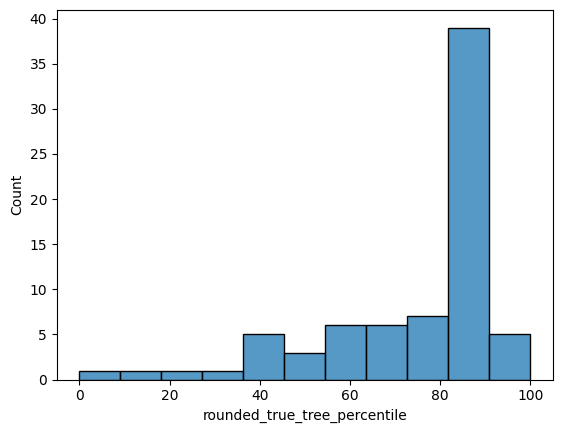

In [4]:
sns.histplot(df_true_tree_percentiles, x="rounded_true_tree_percentile")

In [5]:
df_true_tree_percentiles.sort_values("true_tree_percentile").head(5^20)

,dataset_name,run_name,model_name,true_tree_percentile,rounded_true_tree_percentile
69,yule-10,245,nf-ws-fraction,2.62,0.0
53,yule-10,199,nf-ws-fraction,13.30,10.0
16,yule-10,219,nf-ws-fraction,26.99,20.0
26,yule-10,222,nf-ws-fraction,39.94,30.0
60,yule-10,144,nf-ws-fraction,40.02,40.0
3,yule-10,32,nf-ws-fraction,46.60,40.0
68,yule-10,226,nf-ws-fraction,47.56,40.0
10,yule-10,204,nf-ws-fraction,49.10,40.0
47,yule-10,184,nf-ws-fraction,49.39,40.0
74,yule-10,13,nf-ws-fraction,51.25,50.0


In [6]:
## let's look at yule-10_104_nf-ws-fraction